<h1><center>Performance Assessment Task 1 - Linear Regression Modeling</center></h1>
<h3><center> by Bader Ale <center><h3>

# ▶ Research Question
Our research questions is as follows: __Out of age, income, doctor visits, and days spent in the hospital, which caused a greater increase in the total charge to the patient.__.

In [2]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing origiginal dataset
df = pd.read_csv('F:\GitHub Repos\WGU_MSDA\D208_Predictive Modeling\medical_clean.csv')

# ▶ Data Cleaning  

Target variable :  __*TotalCharge*__  
Explanatory variable(s): __*Age*__  , __*Income*__  , __*Doc-visits*__, __*Initial_Days*__  

In [4]:
# Showing first 5 records
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [62]:
# Creating new dataframe with only those variables of interest
df1 = df[['Age', 'Income', 'Gender', 'VitD_levels', 'Doc_visits', 'Initial_admin','Services', 'TotalCharge']]
df1.head()

,Age,Income,Gender,VitD_levels,Doc_visits,Initial_admin,Services,TotalCharge
0,53,86575.93,Male,19.141466,6,Emergency Admission,Blood Work,3726.702860
1,51,46805.99,Female,18.940352,4,Emergency Admission,Intravenous,4193.190458
2,53,14370.14,Female,18.057507,4,Elective Admission,Blood Work,2434.234222
3,78,39741.49,Male,16.576858,4,Elective Admission,Blood Work,2127.830423
4,22,1209.56,Female,17.439069,5,Elective Admission,CT Scan,2113.073274


## Detection and Treatment of Nulls

In [63]:
# Getting number of rows and columns
df1.shape

(10000, 8)

In [64]:
# Checking for null values
df1.isnull().sum()

Age              0
Income           0
Gender           0
VitD_levels      0
Doc_visits       0
Initial_admin    0
Services         0
TotalCharge      0
dtype: int64

Here we can see there are no Nulls in our new dataframe

## Detection and Treatment of Duplicated Values

In [65]:
# Checking for duplicates
df1.duplicated().value_counts()

False    10000
dtype: int64

The output shows 10000 records as being False, therefore we do not have any duplicated values.

## Detection and Treatment of Outliers

In [66]:
# Checking datatypes for all variables in new dataframe
df1.dtypes

Age                int64
Income           float64
Gender            object
VitD_levels      float64
Doc_visits         int64
Initial_admin     object
Services          object
TotalCharge      float64
dtype: object

We will first focus on the continuous variables and analyze, if any, the outliers. We will normalize our data for ease of visual interpretation

In [70]:
# Performing normalization on the continuous variables for the new dataframe
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df1[['Age', 'Income', 'VitD_levels','Doc_visits','TotalCharge']]) # Selecting only those numerical variables in our new dataframe
scaled = scaler.fit_transform(df1[['Age', 'Income', 'VitD_levels','Doc_visits','TotalCharge']])
df1_norm = pd.DataFrame(scaled, columns = ['Age', 'Income', 'VitD_levels','Doc_visits','TotalCharge']) # Creating a new dataframe for visualization

MinMaxScaler()

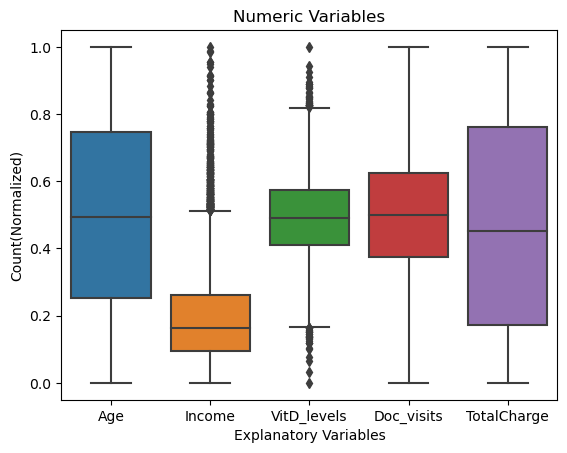

In [71]:
# Plotting boxplots
sns.boxplot(df1_norm)
plt.title('Numeric Variables')
plt.ylabel('Count(Normalized)')
plt.xlabel('Explanatory Variables');

We can see Income and VitD_levels are the numeric variable with outliers. We will use z-scores greater than 3 to eliminate those outliers

In [72]:
# Importing SciPy library
import scipy.stats as stats

In [73]:
# Creating a new column for the Income and VitaminD_level z-scores
df1['Income_z_Scores'] = stats.zscore(df1['Income'])
df1['VitD_level_z_Scores'] = stats.zscore(df1['VitD_levels'])

In [74]:
df1.head(10)

,Age,Income,Gender,VitD_levels,Doc_visits,Initial_admin,Services,TotalCharge,Income_z_Scores,VitD_level_z_Scores
0,53,86575.93,Male,19.141466,6,Emergency Admission,Blood Work,3726.702860,1.615914,0.583603
1,51,46805.99,Female,18.940352,4,Emergency Admission,Intravenous,4193.190458,0.221443,0.483901
2,53,14370.14,Female,18.057507,4,Elective Admission,Blood Work,2434.234222,-0.915870,0.046227
3,78,39741.49,Male,16.576858,4,Elective Admission,Blood Work,2127.830423,-0.026263,-0.687811
4,22,1209.56,Female,17.439069,5,Elective Admission,CT Scan,2113.073274,-1.377325,-0.260366
5,76,81999.88,Male,19.612646,6,Observation Admission,Blood Work,2636.691180,1.455462,0.817193
6,50,10456.05,Male,14.751687,6,Emergency Admission,Intravenous,3694.627161,-1.053111,-1.592646
7,40,38319.29,Female,19.688673,7,Observation Admission,Intravenous,3021.499039,-0.076130,0.854884
8,48,55586.48,Male,19.653320,6,Emergency Admission,Intravenous,2968.402860,0.529317,0.837357
9,78,38965.22,Female,18.224324,7,Emergency Admission,Blood Work,3147.855813,-0.053481,0.128927


In [75]:
# Creating a new dataframe with extracted Income and VitD_levels outliers
df1_no_outliers = df1[(df1['Income_z_Scores'] > -3) & (df1['Income_z_Scores'] < 3) & (df1['VitD_level_z_Scores'] > -3) & (df1['VitD_level_z_Scores'] < 3)]

In [76]:
# Dropping the Income_z_Scores and Vit_D_levels columns since
# we won't need it anymore
df1_no_outliers.drop(['Income_z_Scores', 'VitD_level_z_Scores'], axis=1, inplace=True)

In [78]:
# Checking for Income_z_Score column drop
df1_no_outliers.head()

,Age,Income,Gender,VitD_levels,Doc_visits,Initial_admin,Services,TotalCharge
0,53,86575.93,Male,19.141466,6,Emergency Admission,Blood Work,3726.702860
1,51,46805.99,Female,18.940352,4,Emergency Admission,Intravenous,4193.190458
2,53,14370.14,Female,18.057507,4,Elective Admission,Blood Work,2434.234222
3,78,39741.49,Male,16.576858,4,Elective Admission,Blood Work,2127.830423
4,22,1209.56,Female,17.439069,5,Elective Admission,CT Scan,2113.073274


# ▶ Exploratory Data Analysis  

In [79]:
# Summary Statistics
df1_no_outliers.describe()

,Age,Income,VitD_levels,Doc_visits,TotalCharge
count,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000
mean,53.525069,38903.649265,17.962174,5.011899,5314.010109
std,20.638565,25402.245710,1.990759,1.044358,2180.208144
min,18.000000,154.080000,11.966340,1.000000,1938.312067
25%,36.000000,19359.670000,16.631741,4.000000,3181.474658
50%,53.000000,33261.940000,17.952513,5.000000,5233.963093
75%,71.000000,53261.710000,19.339610,6.000000,7460.305000
max,89.000000,125977.370000,23.941426,9.000000,9180.728000


In [80]:
df1_no_outliers.dtypes

Age                int64
Income           float64
Gender            object
VitD_levels      float64
Doc_visits         int64
Initial_admin     object
Services          object
TotalCharge      float64
dtype: object

## Univariate Analysis  
### Numeric Variables

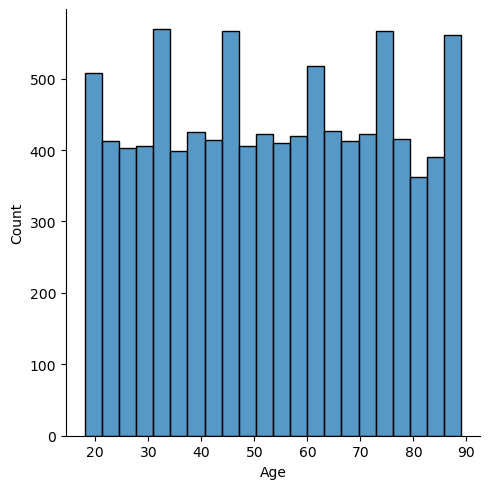

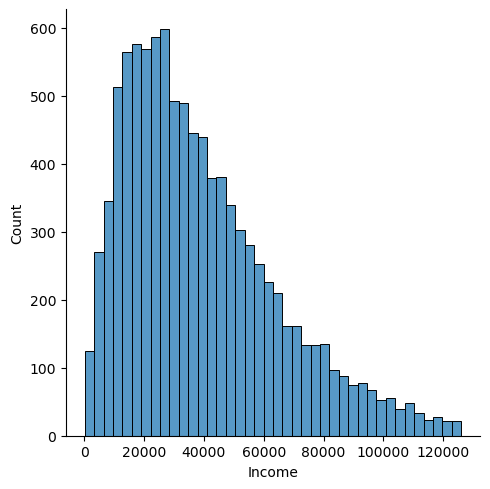

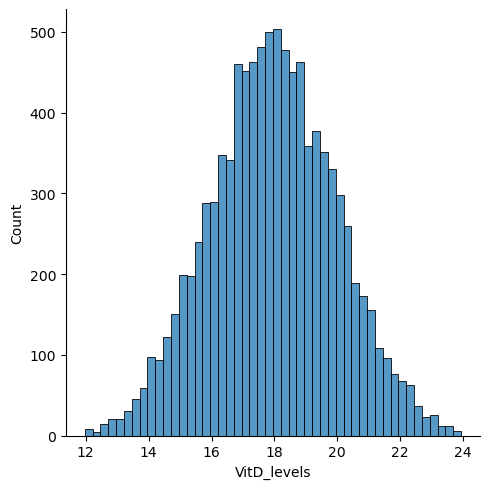

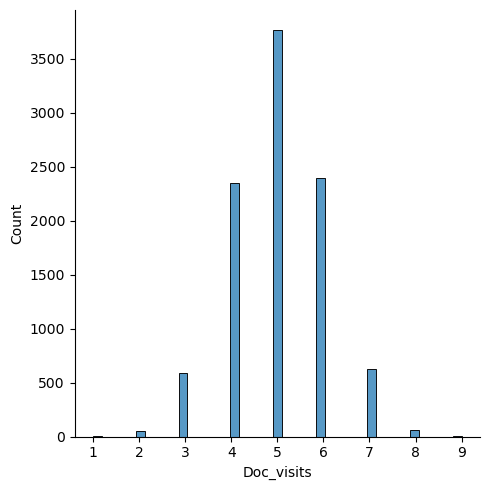

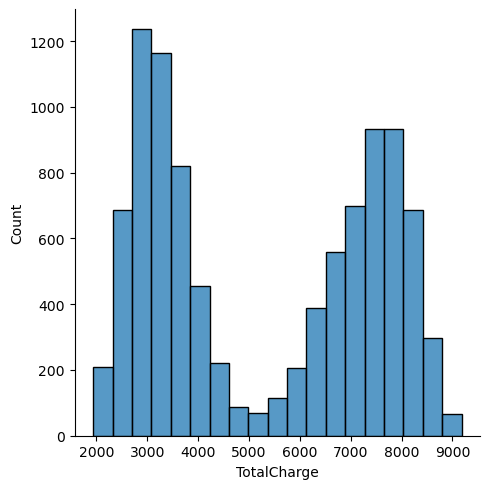

In [81]:
# Univariate analysis visualizations for numerical variables
sns.displot(df1_no_outliers['Age']);
sns.displot(df1_no_outliers['Income']);
sns.displot(df1_no_outliers['VitD_levels']);
sns.displot(df1_no_outliers['Doc_visits']);
sns.displot(df1_no_outliers['TotalCharge']);

### Categorical Variables

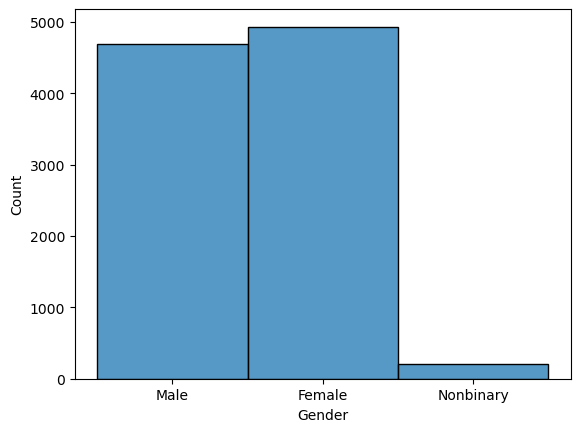

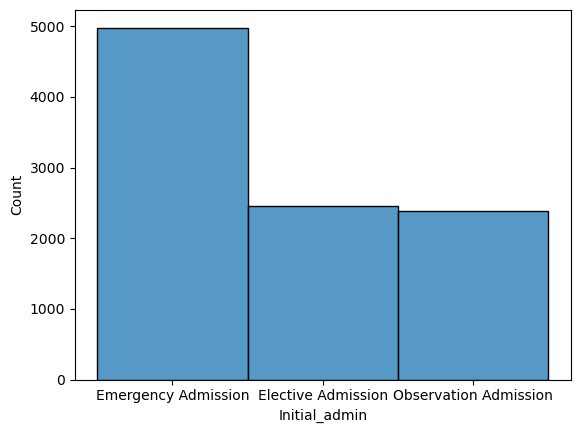

In [90]:
sns.histplot(df1_no_outliers['Initial_admin']);

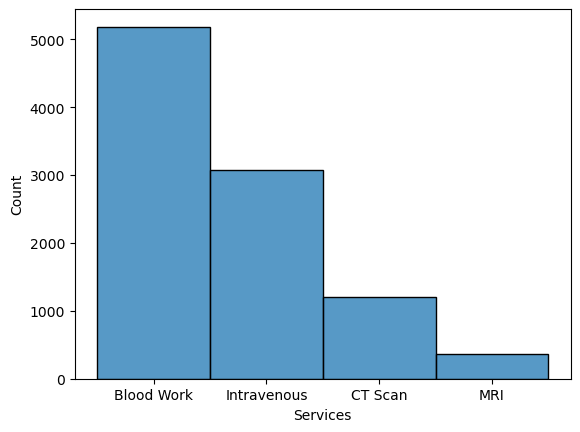

In [92]:
sns.histplot(df1_no_outliers['Services']);

## Bivariate Analysis  
### Numeric Variables

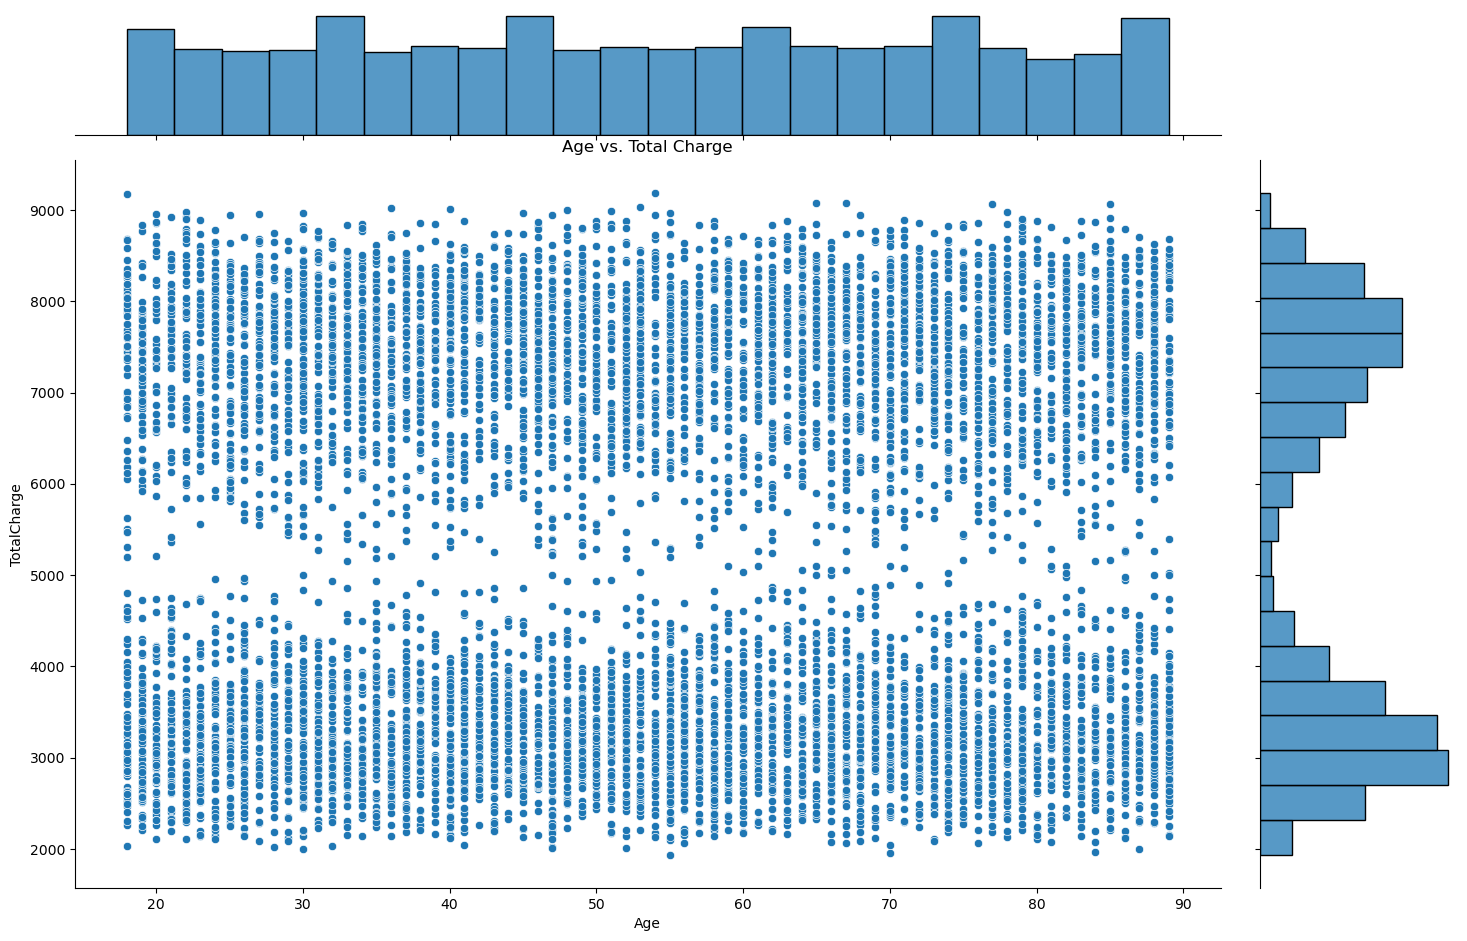

In [21]:
# Bivariate analysis visualizations for Age vs Total_Charge
sns.jointplot(data=df1_no_outliers, x='Age', y='TotalCharge')
plt.title('Age vs. Total Charge')
fig = plt.gcf()
fig.set_size_inches(16, 10);

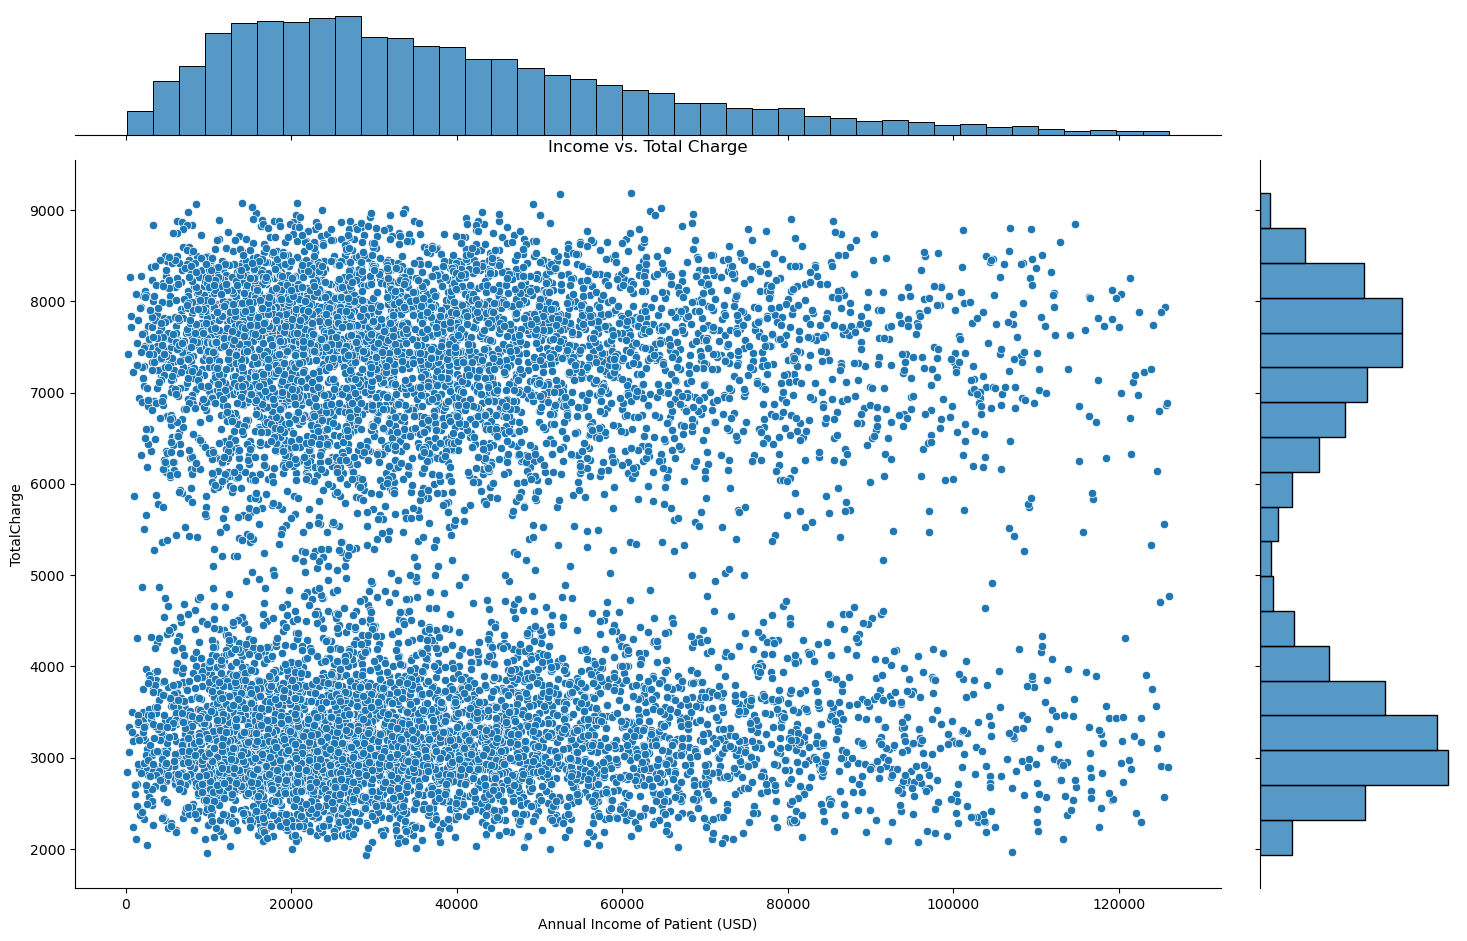

In [22]:
# Income vs Total Charge
sns.jointplot(data=df1_no_outliers, x='Income', y='TotalCharge')
plt.title('Income vs. Total Charge')
plt.xlabel('Annual Income of Patient (USD)')
fig = plt.gcf()
fig.set_size_inches(16, 10);

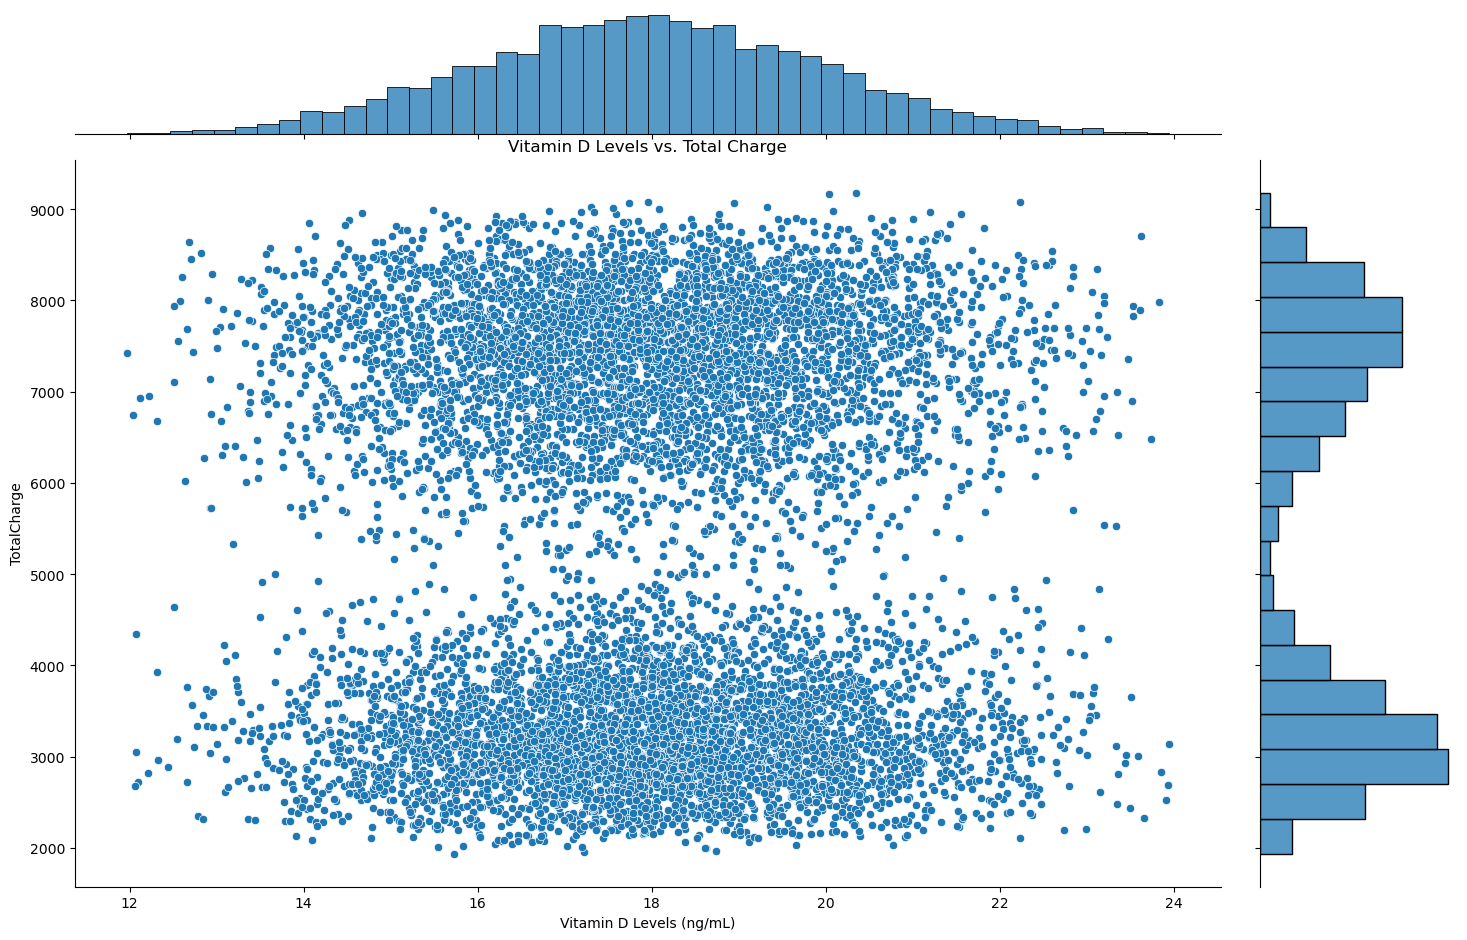

In [93]:
# VitaminD Levels vs Total Charge
sns.jointplot(data=df1_no_outliers, x='VitD_levels', y='TotalCharge')
plt.title('Vitamin D Levels vs. Total Charge')
plt.xlabel('Vitamin D Levels (ng/mL)')
fig = plt.gcf()
fig.set_size_inches(16, 10);

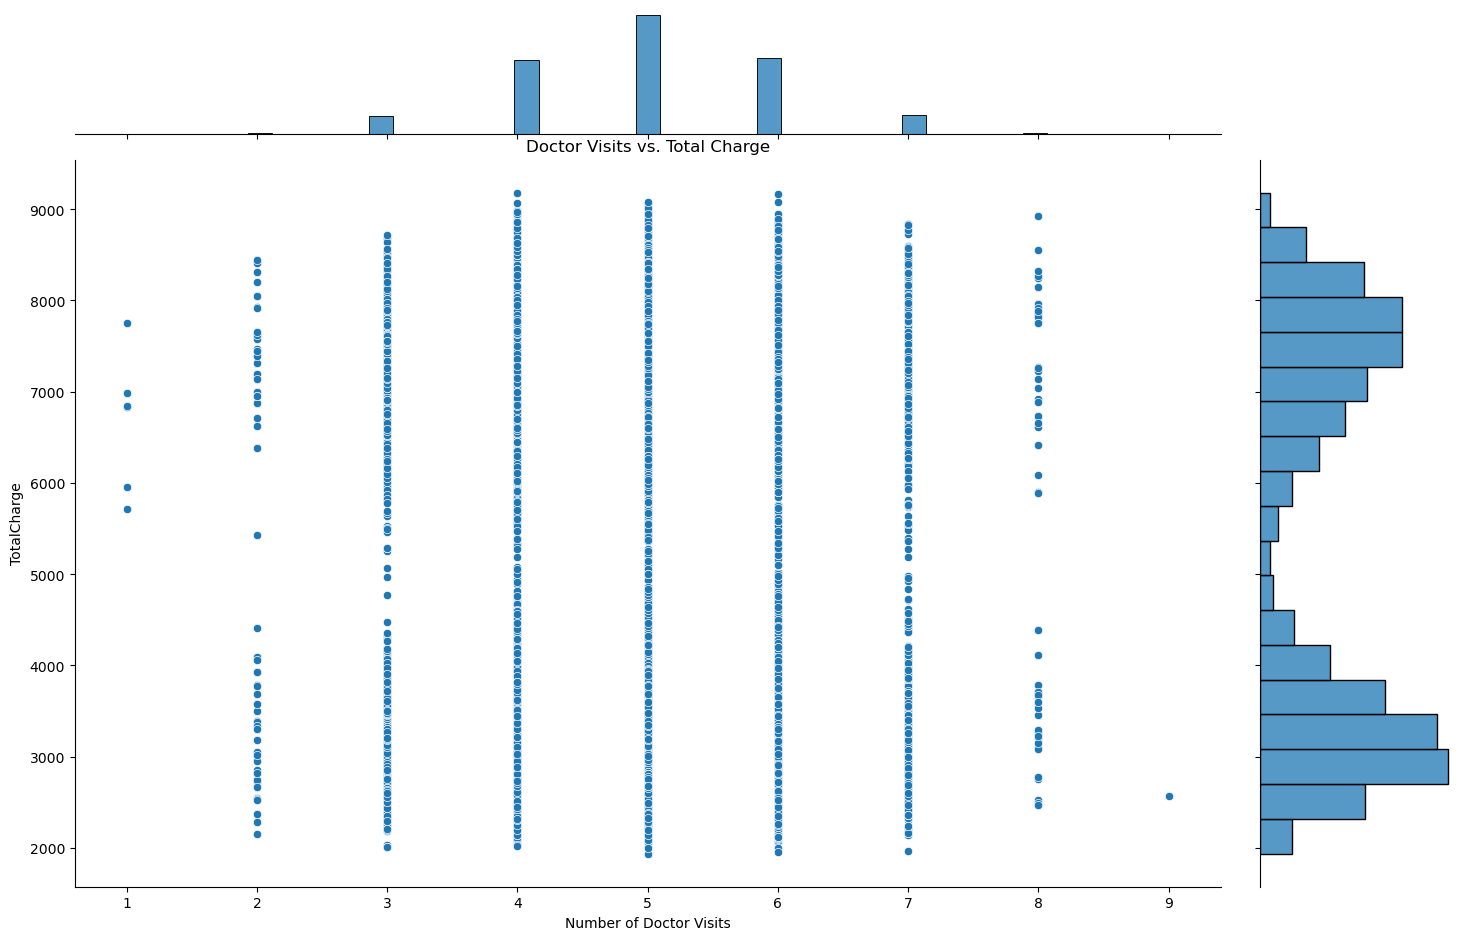

In [94]:
# Doc-Visits vs Total Charge
sns.jointplot(data=df1_no_outliers, x='Doc_visits', y='TotalCharge')
plt.title('Doctor Visits vs. Total Charge')
plt.xlabel('Number of Doctor Visits')
fig = plt.gcf()
fig.set_size_inches(16, 10);

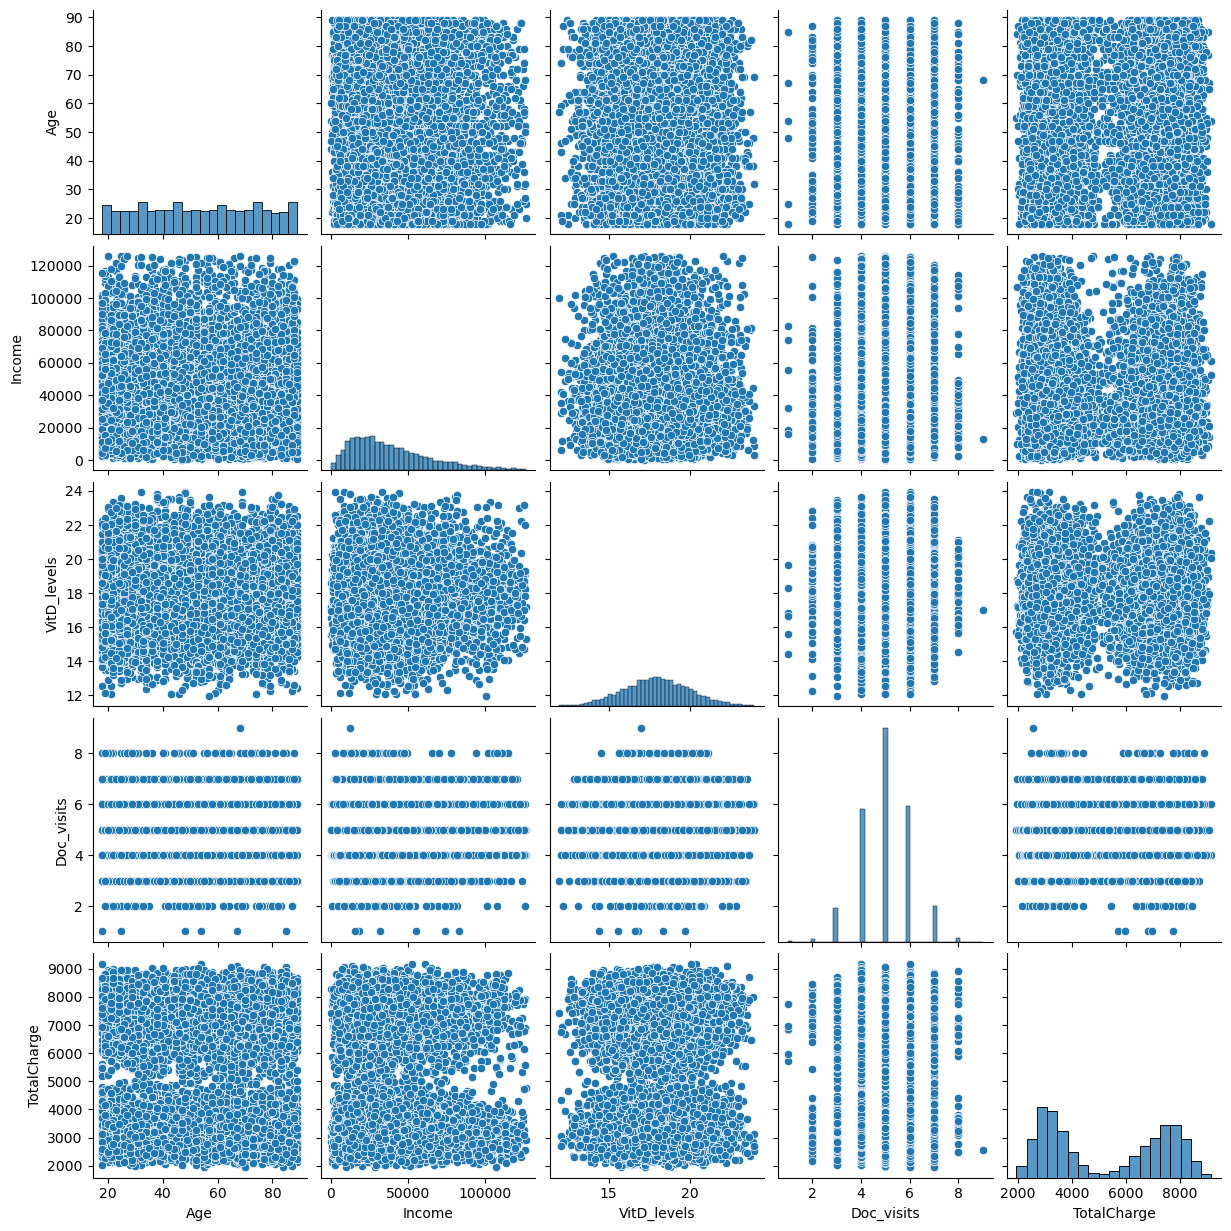

In [95]:
sns.pairplot(df1_no_outliers);

# ▶ Data Wrangling  
In this section, we will rexpress the categorical variables Gender, Initial_admin and Services

In [96]:
# Printing datatypes 
df1_no_outliers.dtypes

Age                int64
Income           float64
Gender            object
VitD_levels      float64
Doc_visits         int64
Initial_admin     object
Services          object
TotalCharge      float64
dtype: object

In [105]:
df1_no_outliers['Gender'].unique()
df1_no_outliers['Initial_admin'].unique()
df1_no_outliers['Services'].unique()

array(['Male', 'Female', 'Nonbinary'], dtype=object)

array(['Emergency Admission', 'Elective Admission',
       'Observation Admission'], dtype=object)

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

In [111]:
df2 = pd.get_dummies(data=df1_no_outliers, columns=['Gender', 'Initial_admin', 'Services'], drop_first=True )

In [112]:
df2.head()

,Age,Income,VitD_levels,Doc_visits,TotalCharge,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,86575.93,19.141466,6,3726.702860,1,0,1,0,0,0,0
1,51,46805.99,18.940352,4,4193.190458,0,0,1,0,0,1,0
2,53,14370.14,18.057507,4,2434.234222,0,0,0,0,0,0,0
3,78,39741.49,16.576858,4,2127.830423,1,0,0,0,0,0,0
4,22,1209.56,17.439069,5,2113.073274,0,0,0,0,1,0,0


In [113]:
# Exporting dataframe to CSV
df2.to_csv('model_data.csv',index=True)

# ▶ Initial Multiple Linear Regression Model  
We will now construct our initial model

In [121]:
import statsmodels.api as sm
import seaborn as sns

In [122]:
df2.head()

,Age,Income,VitD_levels,Doc_visits,TotalCharge,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,86575.93,19.141466,6,3726.702860,1,0,1,0,0,0,0
1,51,46805.99,18.940352,4,4193.190458,0,0,1,0,0,1,0
2,53,14370.14,18.057507,4,2434.234222,0,0,0,0,0,0,0
3,78,39741.49,16.576858,4,2127.830423,1,0,0,0,0,0,0
4,22,1209.56,17.439069,5,2113.073274,0,0,0,0,1,0,0


In [123]:
# Creating feature variables, where X = independent variables and Y=dependent variables
X_data = df2.drop('TotalCharge', axis=1)
Y_data = df2[['TotalCharge']]

print('The shape of the features is:',X_data.shape)
X_data.head()
print('The shape of the labels:',Y_data.shape)
Y_data.head()

The shape of the features is: (9833, 11)


,Age,Income,VitD_levels,Doc_visits,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,86575.93,19.141466,6,1,0,1,0,0,0,0
1,51,46805.99,18.940352,4,0,0,1,0,0,1,0
2,53,14370.14,18.057507,4,0,0,0,0,0,0,0
3,78,39741.49,16.576858,4,1,0,0,0,0,0,0
4,22,1209.56,17.439069,5,0,0,0,0,1,0,0


The shape of the labels: (9833, 1)


,TotalCharge
0,3726.702860
1,4193.190458
2,2434.234222
3,2127.830423
4,2113.073274


In [124]:
# Adding constant to X_data
X_data = sm.add_constant(X_data)

In [125]:
# Fitting regression model 
model = sm.OLS(Y_data,X_data).fit()
predictions_initial = model.predict(X_data)

In [126]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     11.22
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           5.26e-21
Time:                        22:51:53   Log-Likelihood:                -89479.
No. Observations:                9833   AIC:                         1.790e+05
Df Residuals:                    9821   BIC:                         1.791e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### Feature Selection

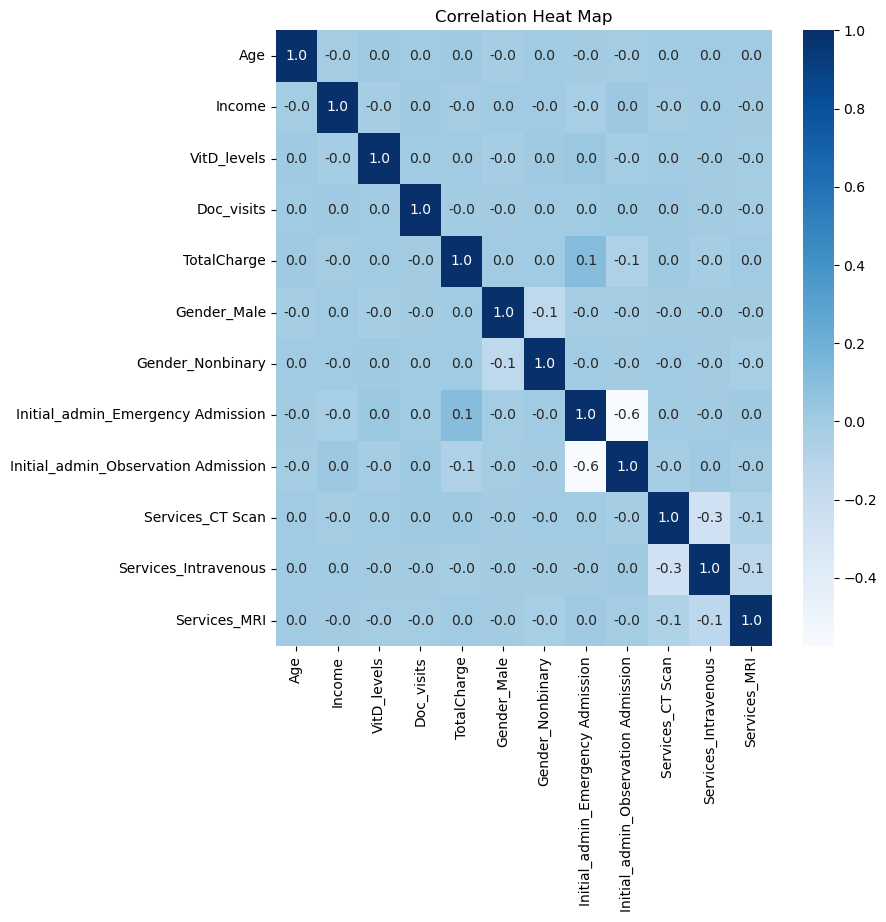

In [127]:
# Visualizing correlation heatmap in seaborn
sns.heatmap(df2.corr(),annot=True, fmt=".1f", cmap='Blues')
plt.title('Correlation Heat Map')
fig = plt.gcf()
fig.set_size_inches(8,8);

# ▶ Reduced Multiple Linear Regression Model

In [145]:
# Performing Recursive Feature Elimination to reduce number of explanatory variable

# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


x_rfe = df2.drop('TotalCharge', axis=1)
y_rfe = df2[['TotalCharge']]

selector = RFE(estimator=RandomForestRegressor(), step=1, n_features_to_select=3)
selector = selector.fit(x_rfe,y_rfe,)

In [146]:
selector.get_feature_names_out()

array(['Age', 'Income', 'VitD_levels'], dtype=object)

In [39]:
X_data2 = df2.drop(['TotalCharge'], axis=1)
Y_data = df2[['TotalCharge']]

print('The shape of the new features is:',X_data2.shape)
X_data2.head()
print('The shape of the labels:',Y_data.shape)
Y_data.head()

The shape of the new features is: (9857, 3)


,Age,Income,Doc_visits
0,53,86575.93,6
1,51,46805.99,4
2,53,14370.14,4
3,78,39741.49,4
4,22,1209.56,5


The shape of the labels: (9857, 1)


,TotalCharge
0,3726.702860
1,4193.190458
2,2434.234222
3,2127.830423
4,2113.073274


In [40]:
# Adding constant to X_data2
X_data2 = sm.add_constant(X_data2)

In [41]:
X_data2.head()

,const,Age,Income,Doc_visits
0,1.0,53,86575.93,6
1,1.0,51,46805.99,4
2,1.0,53,14370.14,4
3,1.0,78,39741.49,4
4,1.0,22,1209.56,5


In [42]:
# Fitting regression model 
model2 = sm.OLS(Y_data,X_data2).fit()
predictions_initial2 = model2.predict(X_data2)

In [43]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.318
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.266
Time:                        20:55:57   Log-Likelihood:                -89757.
No. Observations:                9857   AIC:                         1.795e+05
Df Residuals:                    9853   BIC:                         1.795e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5322.3232    125.798     42.308      0.0

# ▶ Residual Plots (Task I)

### Initial Regression Model

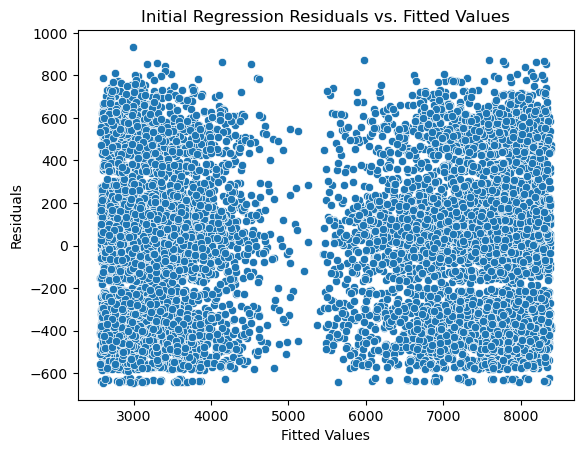

In [44]:
# Scatterplot of residuals vs. fitted values for the Initial Regression Model
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.title('Initial Regression Residuals vs. Fitted Values')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values');


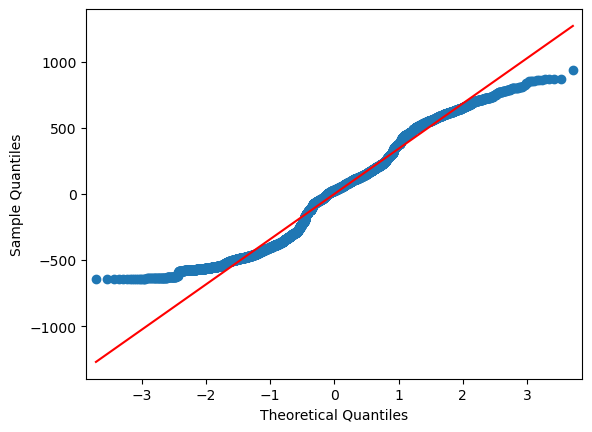

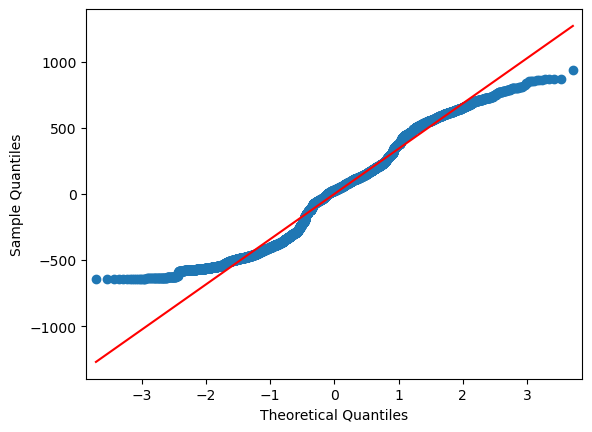

In [45]:
# Q-Q Plot of Initial Regression Model
sm.qqplot(model.resid, line='s')

In [46]:
# Residual Mean Square Error  
model.bse

const           20.255648
Age              0.167003
Income           0.000136
Doc_visits       3.300493
Initial_days     0.130994
dtype: float64

### Reduced Regression Model

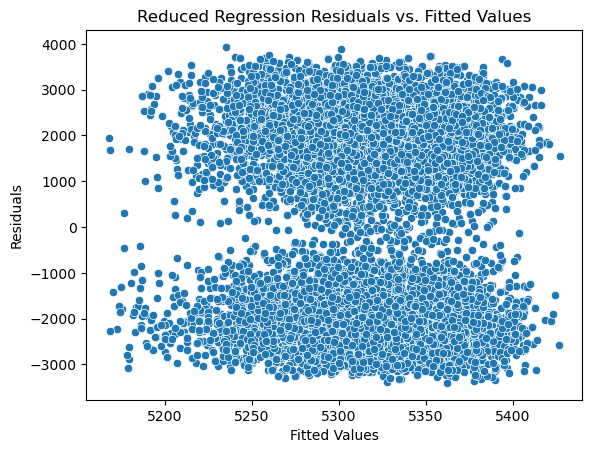

In [47]:
# Scatterplot of residuals vs. fitted values for the reduced Regression Model
sns.scatterplot(x=model2.fittedvalues, y=model2.resid)
plt.title('Reduced Regression Residuals vs. Fitted Values')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values');

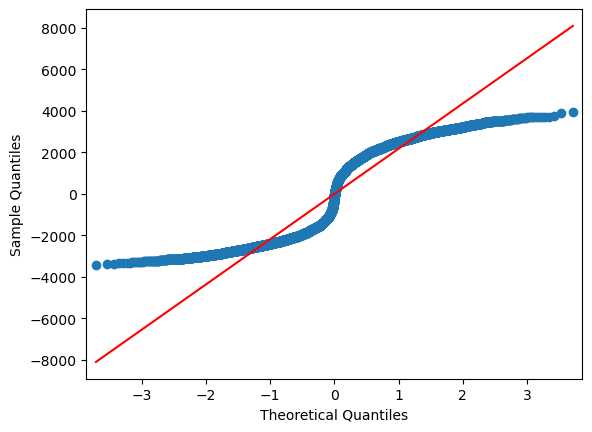

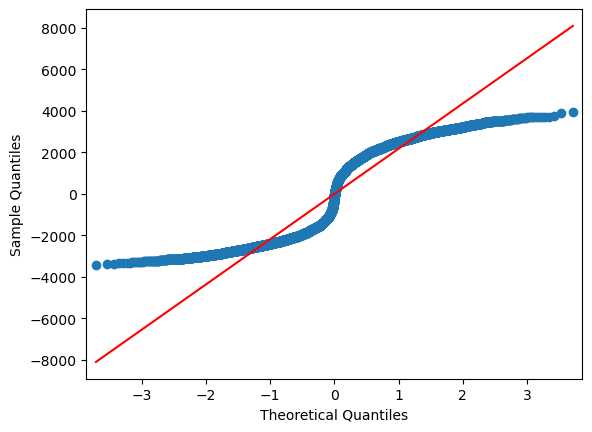

In [48]:
# Q-Q Plot
sm.qqplot(model2.resid, line='s')

In [49]:
# Residual Mean Square Error  
model2.bse

const         125.798190
Age             1.064378
Income          0.000865
Doc_visits     21.036966
dtype: float64

# ▶ Logistic Regression Model